In [7]:
https://www.kaggle.com/datasets/ahsan81/job-placement-dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
job_placement = pd.read_csv('Job_Placement_Data.csv')
job_placement.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [14]:
job_placement.shape

(215, 13)

In [15]:
job_placement.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [16]:
job_placement.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

## Analyzing Data

<AxesSubplot:xlabel='status', ylabel='count'>

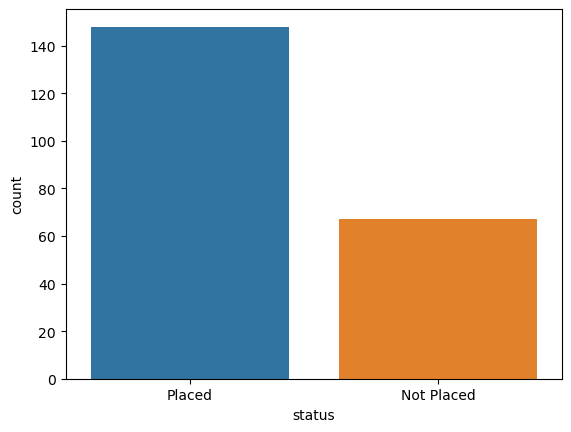

In [22]:
sns.countplot(x="status", data=job_placement)

<AxesSubplot:xlabel='status', ylabel='count'>

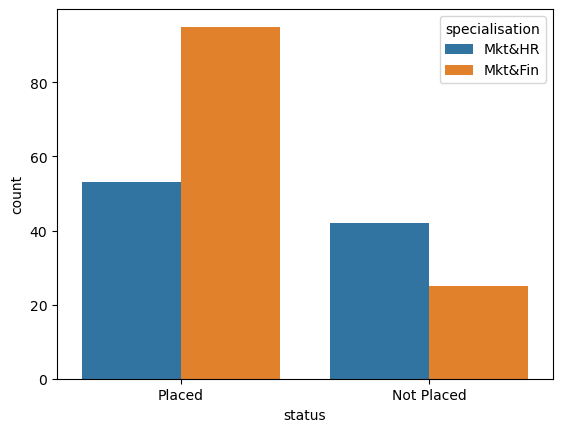

In [29]:
sns.countplot(x="status", hue="specialisation", data=job_placement)

In [44]:
#Encoding categorical data
gender = pd.get_dummies(job_placement['gender'], drop_first=True)
gender.head()

,M
0,1
1,1
2,1
3,1
4,1


In [47]:
#Encoding categorical data
ssc_board = pd.get_dummies(job_placement['ssc_board'], drop_first=True)
ssc_board.head()

,Others
0,1
1,0
2,0
3,0
4,0


In [49]:
#Encoding categorical data
hsc_board = pd.get_dummies(job_placement['hsc_board'], drop_first=True)
hsc_board.head()

,Others
0,1
1,1
2,0
3,0
4,0


In [52]:
#Encoding categorical data
hsc_subject = pd.get_dummies(job_placement['hsc_subject'])
hsc_subject.head()

,Arts,Commerce,Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [54]:
#Encoding categorical data
undergrad_degree = pd.get_dummies(job_placement['undergrad_degree'])
undergrad_degree.head()

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [57]:
#Encoding categorical data
work_experience = pd.get_dummies(job_placement['work_experience'], drop_first = True)
work_experience.head()

,Yes
0,0
1,1
2,0
3,0
4,0


In [74]:
#Encoding categorical data
specialisation = pd.get_dummies(job_placement['specialisation'], drop_first = True)
specialisation.head()

,Mkt&HR
0,1
1,0
2,0
3,1
4,0


In [75]:
#Encoding categorical data
status = pd.get_dummies(job_placement['status'], drop_first = True)
status.head()

,Placed
0,1
1,1
2,1
3,0
4,1


In [77]:
pd.set_option('display.max_columns', None)
job_placement = pd.concat([job_placement, gender, ssc_board, hsc_board, hsc_subject, undergrad_degree, work_experience, specialisation, status], axis=1)
job_placement.head(20)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,M,Others,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,Yes,Mkt&HR,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,1,1,1,0,1,0,0,0,1,0,1,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,1,0,1,0,0,1,0,0,1,1,0,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,1,0,0,1,0,0,1,0,0,0,0,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,1,0,0,0,0,1,0,0,1,0,1,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,1,0,0,0,1,0,1,0,0,0,0,1
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,1,1,1,0,0,1,0,0,1,1,0,0
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0,1,1,0,1,0,1,0,0,0,0,0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,1,0,0,0,0,1,0,0,1,1,0,1
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,1,0,0,0,1,0,1,0,0,0,0,1
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,1,0,0,0,1,0,1,0,0,0,0,0


In [82]:
job_placement.drop(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'], axis=1, inplace=True)

KeyError: "['gender' 'ssc_board' 'hsc_board' 'hsc_subject' 'undergrad_degree'\n 'work_experience' 'specialisation' 'status'] not found in axis"

In [83]:
job_placement.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,M,Others,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,Yes,Mkt&HR,Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,0,1,0,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,1,0,0,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,0,1,0,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,0,1,0,1,0,0,0,0,1


## Train Data

In [87]:
X = job_placement.drop("Placed", axis=1)
y = job_placement["Placed"]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [95]:
X_train

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,M,Others,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,Yes,Mkt&HR
47,63.00,60.00,57.00,78.00,54.55,1,0,0,0,1,0,1,0,0,1,0
202,70.00,63.00,66.00,61.28,60.11,1,0,0,0,0,1,0,0,1,0,1
27,63.00,67.00,66.00,68.00,57.69,1,1,1,0,1,0,1,0,0,0,1
58,74.00,62.00,68.00,74.00,57.99,1,0,1,0,0,1,1,0,0,0,0
40,78.00,77.00,80.00,60.00,66.72,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55.68,61.33,56.87,66.00,58.30,1,1,1,0,1,0,1,0,0,0,1
137,67.00,63.00,72.00,56.00,60.41,1,1,0,0,1,0,1,0,0,0,1
72,84.86,67.00,78.00,95.50,68.53,1,1,1,0,0,1,1,0,0,0,0
140,65.00,64.80,69.50,56.00,56.94,1,0,1,0,1,0,1,0,0,1,0


In [99]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter=1000)
regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [105]:
predictions = regression.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[13,  2],
       [ 2, 26]], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9069767441860465